In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:

df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Drop the features are not required

In [7]:
df = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)


In [8]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Data cleaning


In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df.shape

(13320, 5)

In [11]:
df=df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df.shape

(13246, 5)

Feature engineering

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df



,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


Fix total_sqft
Some data is like “1200-1400”.
Convert to average

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
4+4

8

In [17]:

df[~df['total_sqft'].apply(is_float)].head()


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


Convert the min,max for the total_sqft

In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [19]:
df.total_sqft=df.total_sqft.apply(convert_sqft_to_num)
df=df[df.total_sqft.notnull()]
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Add new feature price per square feet

In [20]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']
df.head()

C:\Users\Niveditha gowda\AppData\Local\Temp\ipykernel_13340\612981178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price']*100000 / df['total_sqft']


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
df_des=df['price_per_sqft'].describe()
df_des

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [22]:
print(df.columns)


Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


In [23]:

df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats


C:\Users\Niveditha gowda\AppData\Local\Temp\ipykernel_13340\3421646769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.location = df.location.apply(lambda x: x.strip())


location
Whitefield                           533
Sarjapur  Road                       392
Electronic City                      304
Kanakpura Road                       264
Thanisandra                          235
                                    ... 
Zuzuvadi                               1
Chellikere                             1
Jakkasandra                            1
Gulakamale                             1
Beml layout, Rajarajeshwari nagar      1
Name: count, Length: 1287, dtype: int64

In [24]:
location_stats.values.sum()

np.int64(13200)

In [25]:
len(location_stats[location_stats>10])

240

In [26]:
len(location_stats)

1287

In [27]:
len(location_stats[location_stats<=10])

1047

Reducation of the data points

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Ganga Nagar                          10
Kalkere                              10
Dairy Circle                         10
1st Block Koramangala                10
Sector 1 HSR Layout                  10
                                     ..
Zuzuvadi                              1
Chellikere                            1
Jakkasandra                           1
Gulakamale                            1
Beml layout, Rajarajeshwari nagar     1
Name: count, Length: 1047, dtype: int64

In [29]:
len(df.location.unique())

1287

In [30]:
df.location=df.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

C:\Users\Niveditha gowda\AppData\Local\Temp\ipykernel_13340\2618988773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.location=df.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)


241

In [31]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


outlier removel 

In [32]:
df[df.total_sqft/df.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
df.shape

(13200, 7)

In [34]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12456, 7)

Outlier removel using standard deviation and mean

In [35]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
import numpy as np 

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10242, 7)

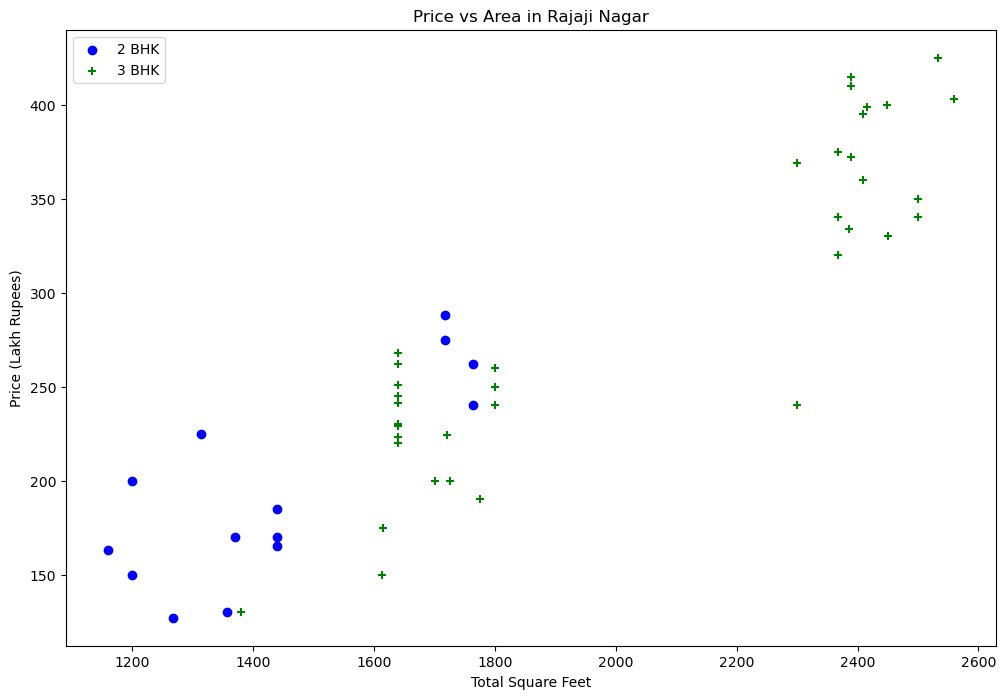

In [37]:
import matplotlib.pyplot as plt
import matplotlib

def plot_scatter_chart(df, location):
    # Filter 2 BHK and 3 BHK data for the given location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    # Set figure size
    matplotlib.rcParams['figure.figsize'] = (12, 8)

    # Plot scatter points
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='+', label='3 BHK')

    # Labels and title
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price (Lakh Rupees)")
    plt.title(f"Price vs Area in {location}")
    plt.legend()
    plt.show()

# Call the function
plot_scatter_chart(df, "Rajaji Nagar")


Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7317, 7)

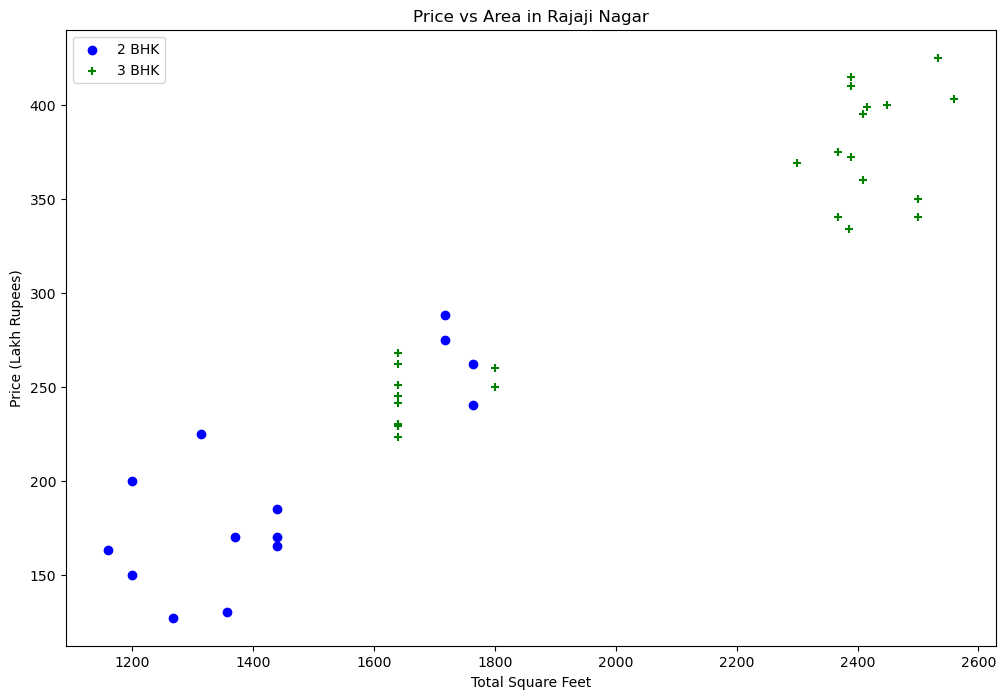

In [39]:
plot_scatter_chart(df,'Rajaji Nagar')

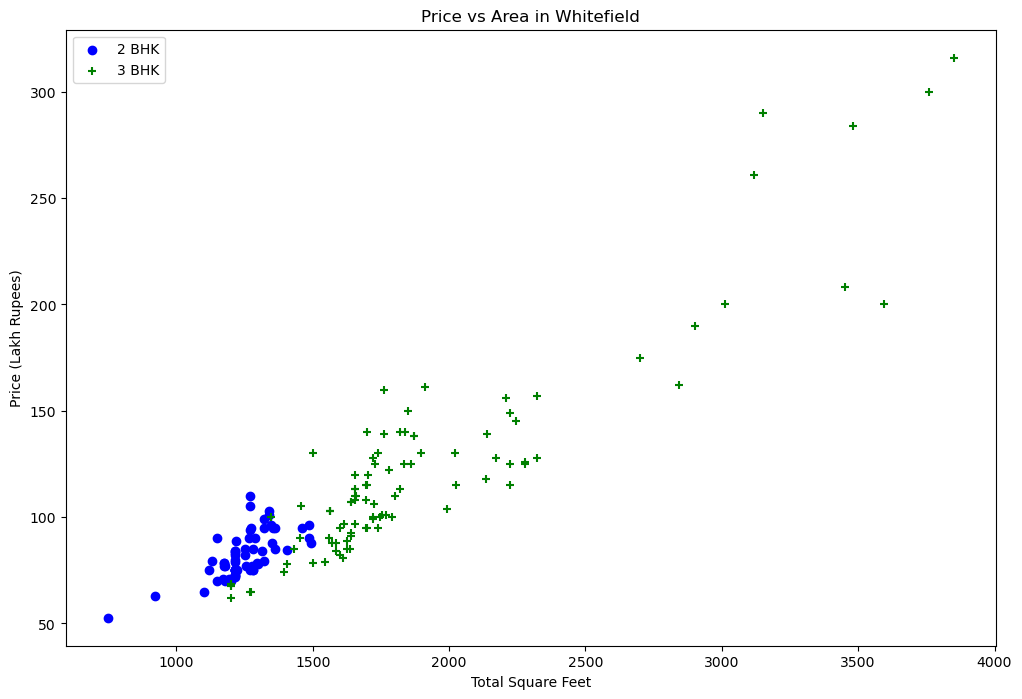

In [40]:
plot_scatter_chart(df,'Whitefield')

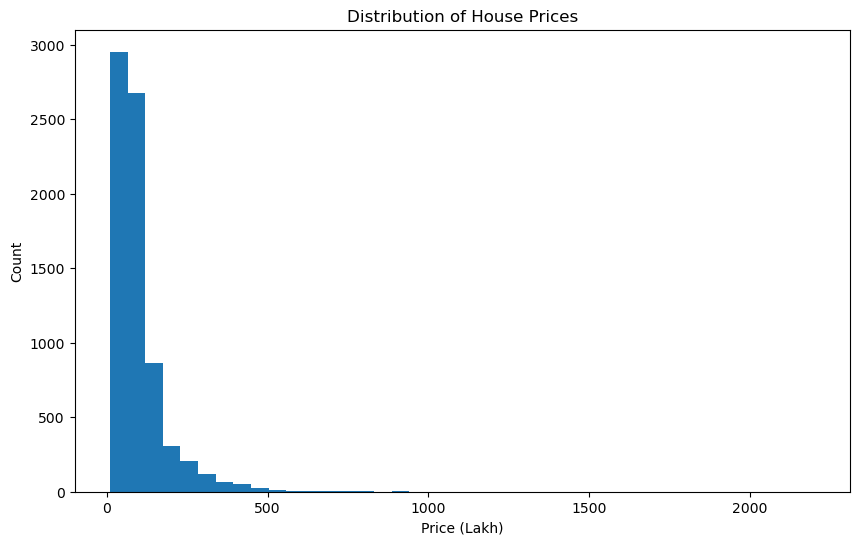

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=40)
plt.xlabel("Price (Lakh)")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()


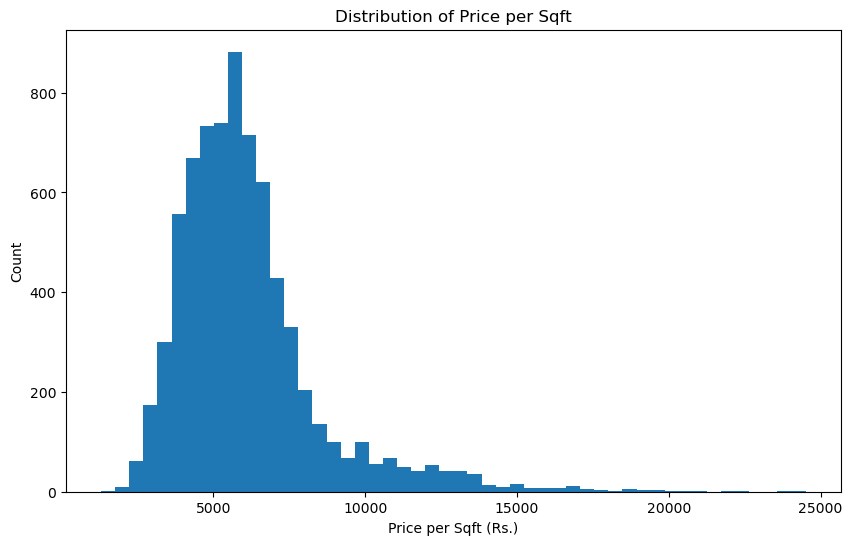

In [42]:
plt.figure(figsize=(10,6))
plt.hist(df['price_per_sqft'], bins=50)
plt.xlabel("Price per Sqft (Rs.)")
plt.ylabel("Count")
plt.title("Distribution of Price per Sqft")
plt.show()


Number of Houses Per Location (Top 20)

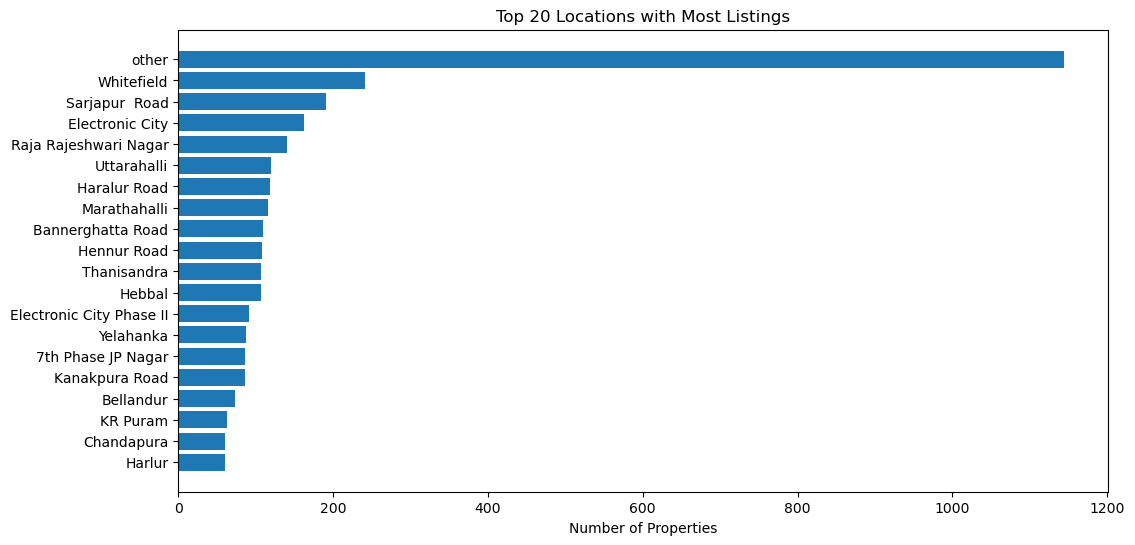

In [43]:
location_counts = df['location'].value_counts()[:20]

plt.figure(figsize=(12,6))
plt.barh(location_counts.index, location_counts.values)
plt.xlabel("Number of Properties")
plt.title("Top 20 Locations with Most Listings")
plt.gca().invert_yaxis()
plt.show()


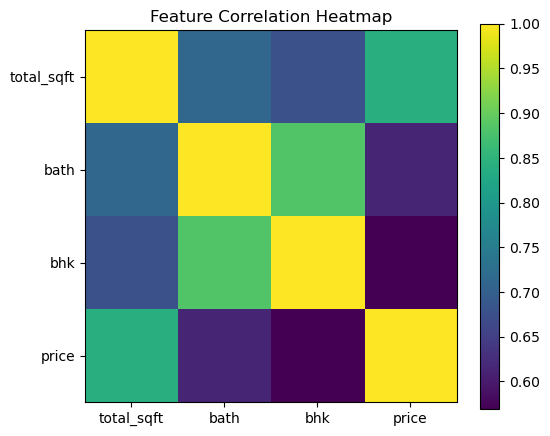

In [44]:
import numpy as np

corr = df[['total_sqft','bath','bhk','price']].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Feature Correlation Heatmap")
plt.show()


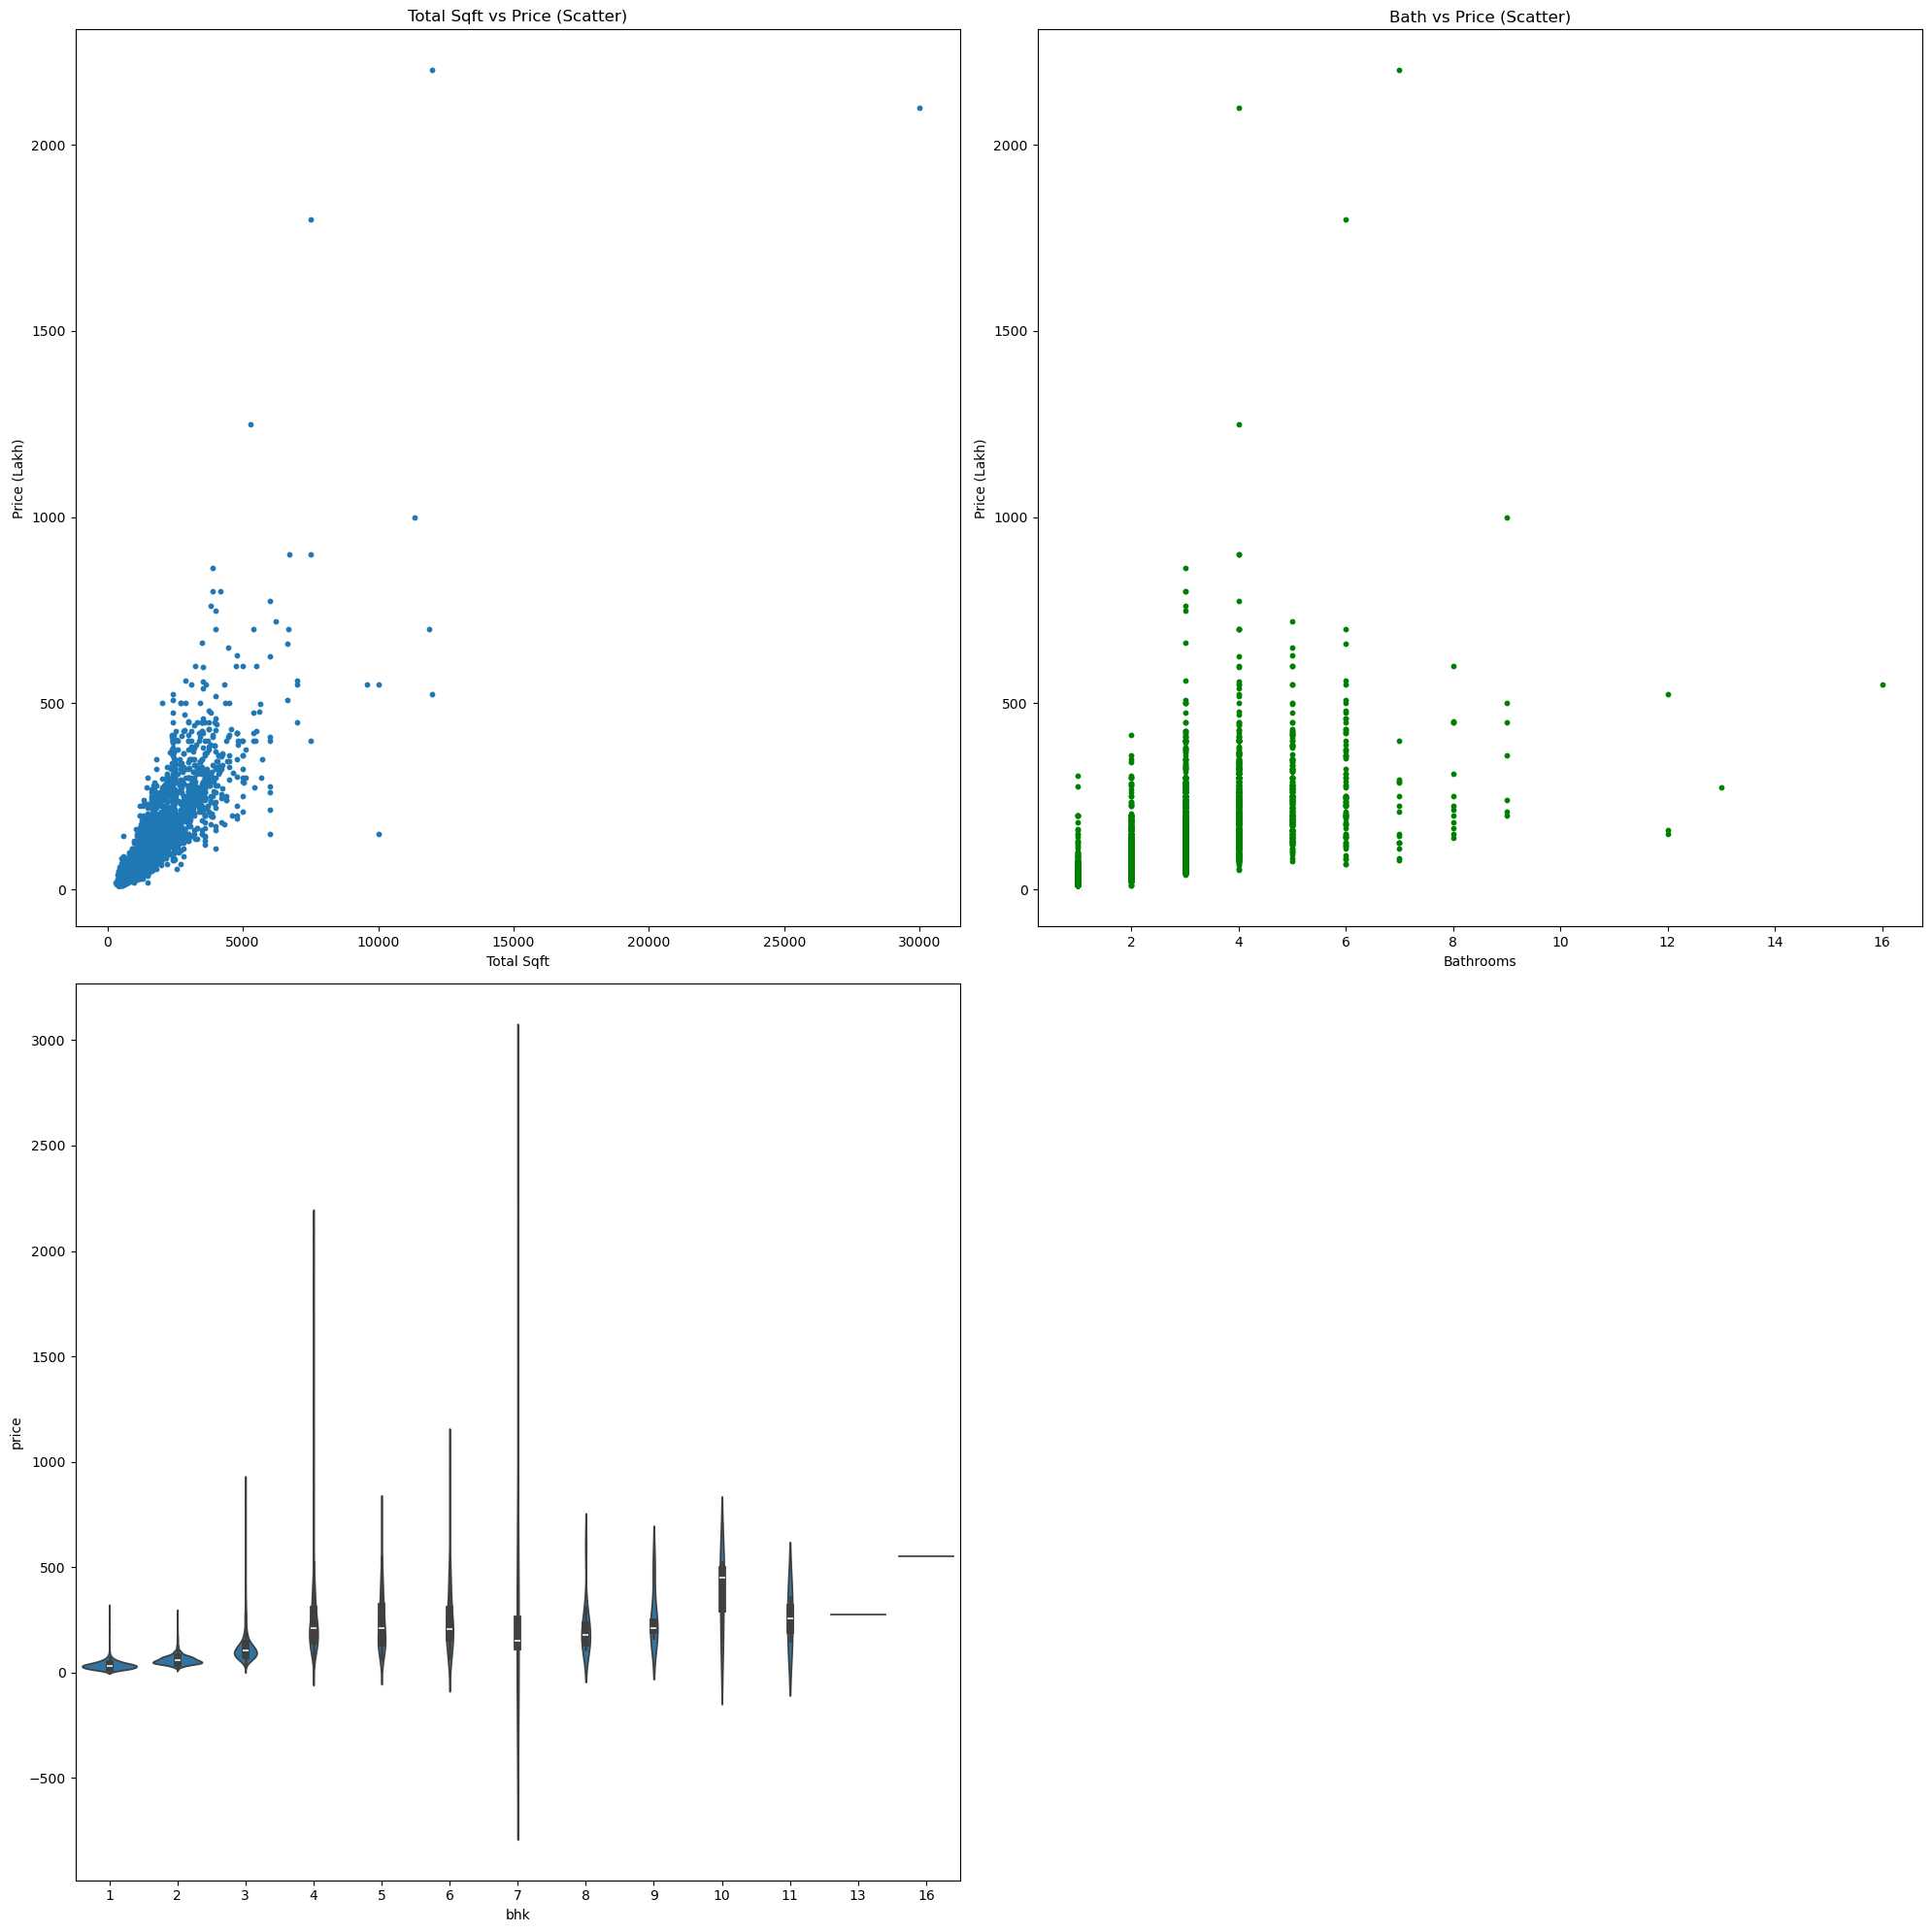

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

# 1. Boxplot for total_sqft vs price
plt.subplot(2,2,1)
plt.scatter(df['total_sqft'], df['price'], s=10)
plt.xlabel("Total Sqft")
plt.ylabel("Price (Lakh)")
plt.title("Total Sqft vs Price (Scatter)")
 
# 2. Scatter plot for bath vs price
plt.subplot(2,2,2)
plt.scatter(df['bath'], df['price'], color='green', s=10)
plt.xlabel("Bathrooms")
plt.ylabel("Price (Lakh)")
plt.title("Bath vs Price (Scatter)")

# 3. Violin plot for bhk vs price
plt.subplot(2,2,3)
sns.violinplot(data=df,x='bhk',y='price')

plt.tight_layout()
plt.show()



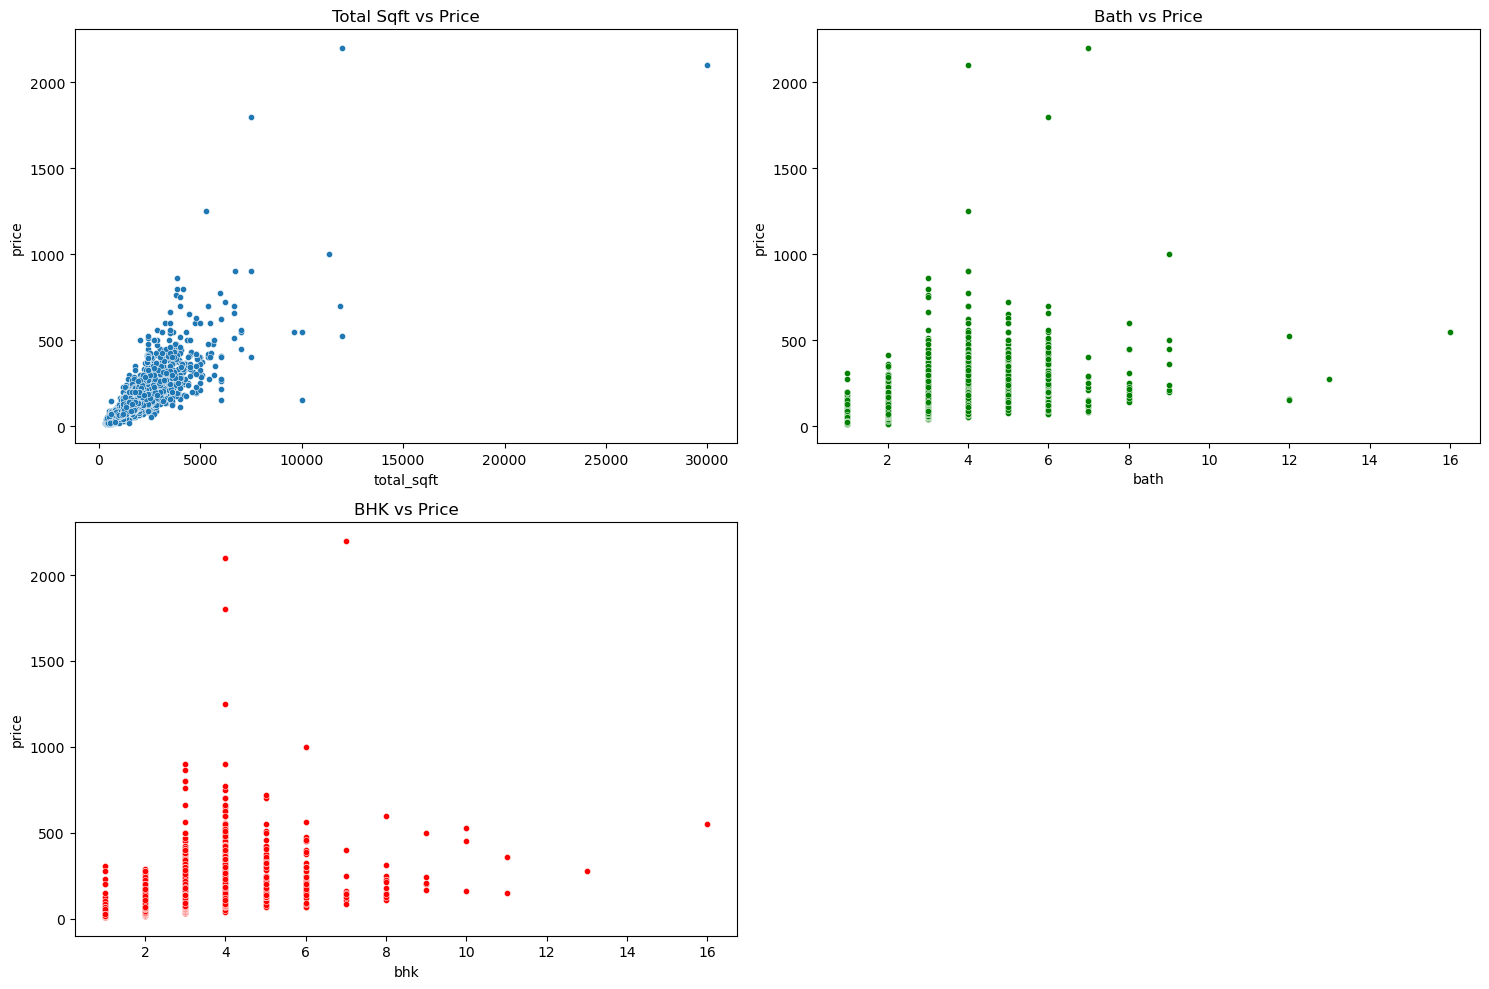

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# 1. total_sqft vs price (Scatter Plot)
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='total_sqft', y='price', s=20)
plt.title("Total Sqft vs Price")

# 2. bath vs price (Scatter Plot)
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='bath', y='price', color='green', s=20)
plt.title("Bath vs Price")

# 3. bhk vs price (Scatter Plot)
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='bhk', y='price', color='red', s=20)
plt.title("BHK vs Price")

plt.tight_layout()
plt.show()


Text(0, 0.5, 'count')

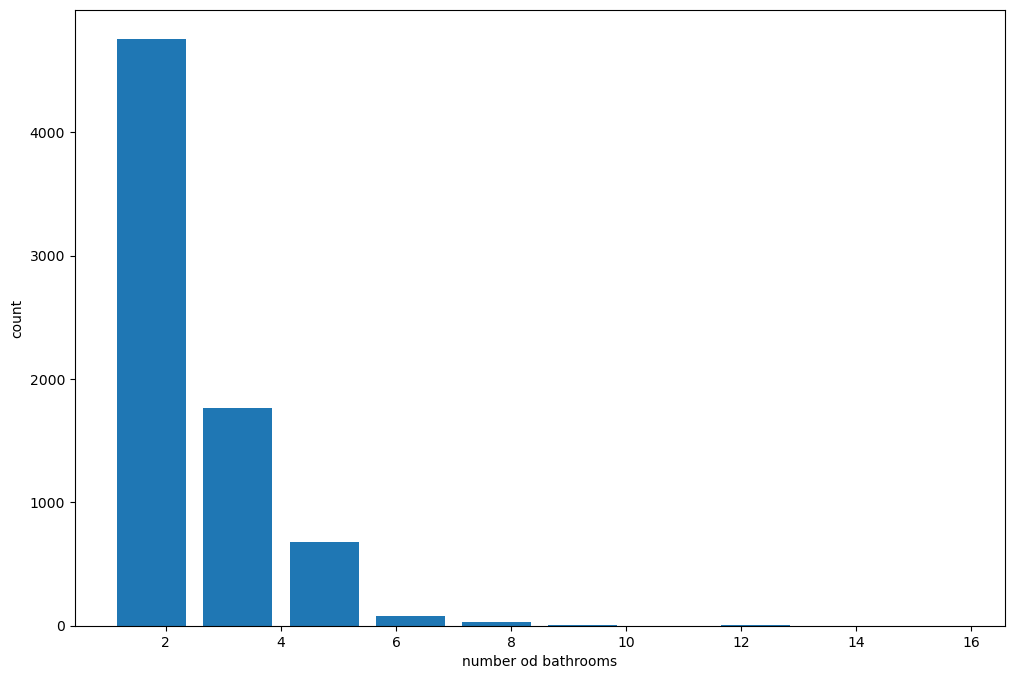

In [47]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel('number od bathrooms')
plt.ylabel('count')

In [48]:
df[df.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [49]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


remove this bath

In [50]:
df=df[df.bath<df.bhk+2]
df.shape

(7239, 7)

In [51]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [52]:
df = df.drop(['size','price_per_sqft'],axis='columns')
df.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


Using One-Hot Encoding for the Location

In [53]:
# 1. Create dummies
dummies = pd.get_dummies(df['location'], drop_first=False).astype(int)

# 2. Remove the "other" column
if "other" in dummies.columns:
    dummies = dummies.drop("other", axis=1)

# 3. Combine with original dataframe
df_final = pd.concat([df.drop('location', axis=1), dummies], axis=1)

df_final.head()



,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_final.shape

(7239, 244)

Build the model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [56]:
X = df_final.drop('price', axis=1)
y = df_final['price']


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, pred))


R2 Score: 0.7971924202569138


In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

models = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'max_iter': [1000, 5000, 10000]
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 5, 10, 20],
            'fit_intercept': [True, False]
        }
    }
}




In [61]:

scores = []

for model_name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

import pandas as pd
results = pd.DataFrame(scores, columns=['model','best_score','best_params'])
results

,model,best_score,best_params
0,linear_regression,0.844027,{'fit_intercept': False}
1,lasso,0.839951,"{'alpha': 0.01, 'max_iter': 1000}"
2,ridge,0.844792,"{'alpha': 0.1, 'fit_intercept': False}"


In [63]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(
    n_estimators=200, 
    random_state=42
)
model.fit(X_train,y_train) 
y_perd=model.predict(X_test) 

print("R2 Score:", r2_score(y_test, y_perd))

R2 Score: 0.7006873143981374


In [67]:
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score

xgb_model = XGBRFRegressor(
    n_estimators=200,
    learning_rate=0.1,
    eval_metric="rmse",  
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("R2 Score xgb:", r2_score(y_test, y_pred))


R2 Score xgb: 0.11894426297186533


In [68]:
from sklearn.linear_model import Ridge

best_model = Ridge(alpha=0.1, fit_intercept=False)
best_model.fit(X, y)  # Train on full dataset (best practice)


Ridge(alpha=0.1, fit_intercept=False)

In [79]:
import pickle

# Suppose best_model is your trained model
data = {
    "model": best_model,
    "columns": df_final.columns.tolist()  # save the columns too
}

with open("bangalore_home_price_model.pkl", "wb") as f:
    pickle.dump(data, f)

